# Brief Description

The purpose of this project was to determine if a relationship exists between extreme poverty and GDP per Capita, by conducting a regression analysis using the train_test_split model. My sample group to conduct this analysis was the BRICS nations. The BRICS is an association of five major emerging market economies (Brazil, Russia, India, China and South Africa) and usually, in developing countries, there is a higher chance of witnessing extreme poverty than in developed nations. Therefore this was an appropriate sample to use as we can be able to observe if growing or declining GDP per Capita affects extreme poverty.

As defined by the World Bank extreme poverty mainly refers to an income below the international poverty line of $1.90 per day.

GDP per Capita is a financial metric that breaks down a country's economic output per person and is calculated by dividing the GDP of a nation by its population.

In [1]:
#Import relevant libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('white')
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':100})
pd.options.display.float_format = '{:,.2f}'.format

# Data Importation and Data Wrangling

In [2]:
#import csv file with the GDP data 
df_gdp = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_3469429GDP.csv')
df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,"2,549,720,670.00","2,534,636,872.00","2,727,849,721.00","2,790,849,162.00","2,962,905,028.00","2,983,636,872.00","3,092,430,168.00","3,202,188,607.00",NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,"19,299,444,453.00","19,709,535,909.00","21,478,715,486.00","25,715,008,783.00","23,510,800,233.00","26,791,601,696.00",...,"942,711,000,000.00","949,849,000,000.00","963,560,000,000.00","983,749,000,000.00","918,647,000,000.00","872,023,000,000.00","984,256,000,000.00","1,011,720,000,000.00","1,008,380,000,000.00","918,815,000,000.00"
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,"537,777,811.10","548,888,895.60","546,666,677.80","751,111,191.10","800,000,044.40","1,006,666,638.00",...,"17,805,113,119.00","19,907,317,066.00","20,146,404,996.00","20,497,126,770.00","19,134,211,764.00","18,116,562,465.00","18,753,469,630.00","18,053,228,579.00","18,799,450,743.00","20,116,137,326.00"
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,"10,404,280,784.00","11,128,050,589.00","11,943,353,288.00","12,676,515,454.00","13,838,577,015.00","14,862,472,886.00",...,"670,963,000,000.00","727,571,000,000.00","820,788,000,000.00","851,487,000,000.00","760,730,000,000.00","690,543,000,000.00","683,742,000,000.00","741,692,000,000.00","794,572,000,000.00","784,588,000,000.00"
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,"111,790,000,000.00","128,053,000,000.00","136,710,000,000.00","145,712,000,000.00","116,194,000,000.00","101,124,000,000.00","122,124,000,000.00","101,353,000,000.00","89,417,190,341.00","58,375,976,293.00"


In [3]:
#Extracting the BRICS GDP into seperate data frames, then transposing the data frames so as to display the information as a traditional column
df_gdp_bra = df_gdp[df_gdp['Country Name'] == 'Brazil']
df_gdp_bra = df_gdp_bra.T

df_gdp_rus = df_gdp[df_gdp['Country Name'] == 'Russian Federation']
df_gdp_rus = df_gdp_rus.T

df_gdp_ind = df_gdp[df_gdp['Country Name'] == 'India']
df_gdp_ind = df_gdp_ind.T

df_gdp_chi = df_gdp[df_gdp['Country Name'] == 'China']
df_gdp_chi = df_gdp_chi.T

df_gdp_rsa = df_gdp[df_gdp['Country Name'] == 'South Africa']
df_gdp_rsa = df_gdp_rsa.T

df_gdp_world = df_gdp[df_gdp['Country Name'] == 'World']
df_gdp_world = df_gdp_world.T

In [4]:
#Checking dataframe
df_gdp_rsa

,263
Country Name,South Africa
Country Code,ZAF
Indicator Name,GDP (current US$)
Indicator Code,NY.GDP.MKTP.CD
1960,"7,575,396,973.00"
...,...
2016,"323,586,000,000.00"
2017,"381,449,000,000.00"
2018,"404,842,000,000.00"
2019,"387,935,000,000.00"


In [5]:
#Further cleaning of dataframes by dropping unnecessary rows
df_gdp_bra_clean = df_gdp_bra.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=0)
df_gdp_rus_clean = df_gdp_rus.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=0)
df_gdp_ind_clean = df_gdp_ind.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=0)
df_gdp_chi_clean = df_gdp_chi.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=0)
df_gdp_rsa_clean = df_gdp_rsa.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=0)
df_gdp_world_clean = df_gdp_world.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=0)


In [6]:
#Checking dataframe
df_gdp_rsa_clean

,263
1960,"7,575,396,973.00"
1961,"7,972,996,814.00"
1962,"8,497,996,604.00"
1963,"9,423,396,235.00"
1964,"10,373,995,855.00"
...,...
2016,"323,586,000,000.00"
2017,"381,449,000,000.00"
2018,"404,842,000,000.00"
2019,"387,935,000,000.00"


In [7]:
#renaming the columns and the index
df_gdp_bra_clean.rename(columns = {29:'Brazil GDP'}, inplace= True)
df_gdp_bra_clean.index.names = ['Year']

df_gdp_rus_clean.rename(columns = {202:'Russia GDP'}, inplace= True)
df_gdp_rus_clean.index.names = ['Year']

df_gdp_ind_clean.rename(columns = {109:'India GDP'}, inplace= True)
df_gdp_ind_clean.index.names = ['Year']

df_gdp_chi_clean.rename(columns = {40:'China GDP'}, inplace= True)
df_gdp_chi_clean.index.names = ['Year']

df_gdp_rsa_clean.rename(columns = {263:'South Africa GDP'}, inplace= True)
df_gdp_rsa_clean.index.names = ['Year']

df_gdp_world_clean.rename(columns = {259:'World GDP'}, inplace= True)
df_gdp_world_clean.index.names = ['Year']

In [8]:
#Concatenating the data frames to make one data frame for GDP
df_gdp_brics = pd.concat([df_gdp_bra_clean, df_gdp_rus_clean, df_gdp_ind_clean, df_gdp_chi_clean, df_gdp_rsa_clean], axis = 1)
df_gdp_brics.tail()

,Brazil GDP,Russia GDP,India GDP,China GDP,South Africa GDP
Year,,,,,
2016,"1,795,690,000,000.00","1,276,790,000,000.00","2,294,800,000,000.00","11,233,300,000,000.00","323,586,000,000.00"
2017,"2,063,510,000,000.00","1,574,200,000,000.00","2,651,470,000,000.00","12,310,400,000,000.00","381,449,000,000.00"
2018,"1,916,930,000,000.00","1,657,330,000,000.00","2,701,110,000,000.00","13,894,800,000,000.00","404,842,000,000.00"
2019,"1,877,820,000,000.00","1,687,450,000,000.00","2,870,500,000,000.00","14,279,900,000,000.00","387,935,000,000.00"
2020,"1,444,730,000,000.00","1,483,500,000,000.00","2,660,250,000,000.00","14,722,700,000,000.00","335,442,000,000.00"


In [9]:
#Converting the GDP to a float data type
df_gdp_brics['Brazil GDP'] =pd.to_numeric(df_gdp_brics['Brazil GDP'])
df_gdp_brics['Russia GDP'] =pd.to_numeric(df_gdp_brics['Russia GDP'])
df_gdp_brics['India GDP'] =pd.to_numeric(df_gdp_brics['India GDP'])
df_gdp_brics['China GDP'] =pd.to_numeric(df_gdp_brics['China GDP'])
df_gdp_brics['South Africa GDP'] =pd.to_numeric(df_gdp_brics['South Africa GDP'])
df_gdp_world_clean['World GDP'] =pd.to_numeric(df_gdp_world_clean['World GDP'])

print(df_gdp_brics.dtypes)
print(df_gdp_world_clean.dtypes)

Brazil GDP          float64
Russia GDP          float64
India GDP           float64
China GDP           float64
South Africa GDP    float64
dtype: object
World GDP    float64
dtype: object


In [10]:
#Slicing the data frame so data starts from 1981 to 2019
df_gdp_brics_final = df_gdp_brics.iloc[21:-1]
df_gdp_brics_final

,Brazil GDP,Russia GDP,India GDP,China GDP,South Africa GDP
Year,,,,,
1981,"258,015,000,000.00",NaN,"193,491,000,000.00","195,866,000,000.00","85,454,420,500.00"
1982,"271,314,000,000.00",NaN,"200,715,000,000.00","205,090,000,000.00","78,423,059,790.00"
1983,"189,657,000,000.00",NaN,"218,262,000,000.00","230,687,000,000.00","87,415,851,376.00"
1984,"188,340,000,000.00",NaN,"212,158,000,000.00","259,947,000,000.00","77,344,092,907.00"
1985,"210,880,000,000.00",NaN,"232,512,000,000.00","309,488,000,000.00","59,082,638,804.00"
1986,"256,481,000,000.00",NaN,"248,986,000,000.00","300,758,000,000.00","67,521,602,553.00"
1987,"283,057,000,000.00",NaN,"279,034,000,000.00","272,973,000,000.00","88,573,697,223.00"
1988,"308,334,000,000.00","554,713,000,000.00","296,589,000,000.00","312,354,000,000.00","95,176,640,968.00"
1989,"347,028,000,000.00","506,500,000,000.00","296,042,000,000.00","347,768,000,000.00","99,030,856,825.00"


In [11]:
#Russia has missing values form 1981 to 1987 so will use KNN to fill in those values
imputer = KNNImputer(n_neighbors = 5)
df_rus_gdp_filled = imputer.fit_transform(df_gdp_brics_final[['Russia GDP']])
df_rus_gdp_filled[:7]

array([[9.56434375e+11],
       [9.56434375e+11],
       [9.56434375e+11],
       [9.56434375e+11],
       [9.56434375e+11],
       [9.56434375e+11],
       [9.56434375e+11]])

In [12]:
#Assigning the filled values to the Russia GDP column
df_gdp_brics_final['Russia GDP'] = df_rus_gdp_filled
df_gdp_brics_final.head(10)

<ipython-input-12-9a0be9b7482b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_brics_final['Russia GDP'] = df_rus_gdp_filled


,Brazil GDP,Russia GDP,India GDP,China GDP,South Africa GDP
Year,,,,,
1981,"258,015,000,000.00","956,434,375,000.00","193,491,000,000.00","195,866,000,000.00","85,454,420,500.00"
1982,"271,314,000,000.00","956,434,375,000.00","200,715,000,000.00","205,090,000,000.00","78,423,059,790.00"
1983,"189,657,000,000.00","956,434,375,000.00","218,262,000,000.00","230,687,000,000.00","87,415,851,376.00"
1984,"188,340,000,000.00","956,434,375,000.00","212,158,000,000.00","259,947,000,000.00","77,344,092,907.00"
1985,"210,880,000,000.00","956,434,375,000.00","232,512,000,000.00","309,488,000,000.00","59,082,638,804.00"
1986,"256,481,000,000.00","956,434,375,000.00","248,986,000,000.00","300,758,000,000.00","67,521,602,553.00"
1987,"283,057,000,000.00","956,434,375,000.00","279,034,000,000.00","272,973,000,000.00","88,573,697,223.00"
1988,"308,334,000,000.00","554,713,000,000.00","296,589,000,000.00","312,354,000,000.00","95,176,640,968.00"
1989,"347,028,000,000.00","506,500,000,000.00","296,042,000,000.00","347,768,000,000.00","99,030,856,825.00"


In [13]:
#importing csv file with population data
df_pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_3469297POP.csv')
df_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,"54,208.00","55,434.00","56,234.00","56,699.00","57,029.00","57,357.00",...,"102,050.00","102,565.00","103,165.00","103,776.00","104,339.00","104,865.00","105,361.00","105,846.00","106,310.00","106,766.00"
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,"130,836,765.00","134,159,786.00","137,614,644.00","141,202,036.00","144,920,186.00","148,769,974.00",...,"532,760,424.00","547,482,863.00","562,601,578.00","578,075,373.00","593,871,847.00","609,978,946.00","626,392,880.00","643,090,131.00","660,046,272.00","677,243,299.00"
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,"8,996,967.00","9,169,406.00","9,351,442.00","9,543,200.00","9,744,772.00","9,956,318.00",...,"30,117,411.00","31,161,378.00","32,269,592.00","33,370,804.00","34,413,603.00","35,383,028.00","36,296,111.00","37,171,922.00","38,041,757.00","38,928,341.00"
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,"96,396,419.00","98,407,221.00","100,506,960.00","102,691,339.00","104,953,470.00","107,289,875.00",...,"360,285,439.00","370,243,017.00","380,437,896.00","390,882,979.00","401,586,651.00","412,551,299.00","423,769,930.00","435,229,381.00","446,911,598.00","458,803,476.00"
4,Angola,AGO,"Population, total",SP.POP.TOTL,"5,454,938.00","5,531,451.00","5,608,499.00","5,679,409.00","5,734,995.00","5,770,573.00",...,"24,220,660.00","25,107,925.00","26,015,786.00","26,941,773.00","27,884,380.00","28,842,482.00","29,816,769.00","30,809,787.00","31,825,299.00","32,866,268.00"


In [14]:
#Extracting the BRICS population data into seperate data frames and transposing the data frames so they display correctly
df_pop_bra = df_pop[df_pop['Country Name'] == 'Brazil']
df_pop_bra = df_pop_bra.T

df_pop_rus = df_pop[df_gdp['Country Name'] == 'Russian Federation']
df_pop_rus = df_pop_rus.T

df_pop_ind = df_pop[df_gdp['Country Name'] == 'India']
df_pop_ind = df_pop_ind.T

df_pop_chi = df_pop[df_gdp['Country Name'] == 'China']
df_pop_chi = df_pop_chi.T

df_pop_rsa = df_pop[df_gdp['Country Name'] == 'South Africa']
df_pop_rsa = df_pop_rsa.T

df_pop_world = df_pop[df_gdp['Country Name'] == 'World']
df_pop_world = df_pop_world.T

In [15]:
#Checking if dataframes are transposed
df_pop_rsa

,263
Country Name,South Africa
Country Code,ZAF
Indicator Name,"Population, total"
Indicator Code,SP.POP.TOTL
1960,"17,099,836.00"
...,...
2016,"56,207,649.00"
2017,"57,009,751.00"
2018,"57,792,520.00"
2019,"58,558,267.00"


In [16]:
#Dropping unnecessary rows
df_pop_bra_clean = df_pop_bra.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code' ], axis=0)
df_pop_rus_clean = df_pop_rus.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code' ], axis=0)
df_pop_ind_clean = df_pop_ind.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code' ], axis=0)
df_pop_chi_clean = df_pop_chi.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code' ], axis=0)
df_pop_rsa_clean = df_pop_rsa.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code' ], axis=0)
df_pop_world_clean = df_pop_world.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code' ], axis=0)

In [17]:
#Checking if unnecessary rows are removed
df_pop_world_clean

,259
1960,"3,032,156,070.00"
1961,"3,071,596,055.00"
1962,"3,124,561,005.00"
1963,"3,189,655,687.00"
1964,"3,255,145,692.00"
...,...
2016,"7,433,569,330.00"
2017,"7,519,183,459.00"
2018,"7,602,454,161.00"
2019,"7,683,372,259.00"


In [18]:
#Renaming column names
df_pop_bra_clean.rename(columns = {29:'Brazil Population'}, inplace= True)
df_pop_bra_clean.index.names = ['Year']

df_pop_rus_clean.rename(columns = {202:'Russia Population'}, inplace= True)
df_pop_rus_clean.index.names = ['Year']

df_pop_ind_clean.rename(columns = {109:'India Population'}, inplace= True)
df_pop_ind_clean.index.names = ['Year']

df_pop_chi_clean.rename(columns = {40:'China Population'}, inplace= True)
df_pop_chi_clean.index.names = ['Year']

df_pop_rsa_clean.rename(columns = {263:'South Africa Population'}, inplace= True)
df_pop_rsa_clean.index.names = ['Year']

df_pop_world_clean.rename(columns = {259:'World Population'}, inplace= True)
df_pop_world_clean.index.names = ['Year']

In [19]:
#Checking data types
print(df_pop_bra_clean.dtypes)
print(df_pop_rus_clean.dtypes)
print(df_pop_ind_clean.dtypes)
print(df_pop_chi_clean.dtypes)
print(df_pop_rsa_clean.dtypes)
print(df_pop_world_clean.dtypes)

Brazil Population    object
dtype: object
Russia Population    object
dtype: object
India Population    object
dtype: object
China Population    object
dtype: object
South Africa Population    object
dtype: object
World Population    object
dtype: object


In [20]:
#Converting the population data to a float data type
df_pop_bra_clean['Brazil Population'] =pd.to_numeric(df_pop_bra_clean['Brazil Population'])
df_pop_rus_clean['Russia Population'] =pd.to_numeric(df_pop_rus_clean['Russia Population'])
df_pop_ind_clean['India Population'] =pd.to_numeric(df_pop_ind_clean['India Population'])
df_pop_chi_clean['China Population'] =pd.to_numeric(df_pop_chi_clean['China Population'])
df_pop_rsa_clean['South Africa Population'] =pd.to_numeric(df_pop_rsa_clean['South Africa Population'])
df_pop_world_clean['World Population'] =pd.to_numeric(df_pop_world_clean['World Population'])

print(df_pop_bra_clean.dtypes)
print(df_pop_rus_clean.dtypes)
print(df_pop_ind_clean.dtypes)
print(df_pop_chi_clean.dtypes)
print(df_pop_rsa_clean.dtypes)
print(df_pop_world_clean.dtypes)

Brazil Population    float64
dtype: object
Russia Population    float64
dtype: object
India Population    float64
dtype: object
China Population    float64
dtype: object
South Africa Population    float64
dtype: object
World Population    float64
dtype: object


In [21]:
#Concatenating the dataframes
df_pop_brics = pd.concat([df_pop_bra_clean, df_pop_rus_clean, df_pop_ind_clean, df_pop_chi_clean, df_pop_rsa_clean], axis = 1)
df_pop_brics.tail()

,Brazil Population,Russia Population,India Population,China Population,South Africa Population
Year,,,,,
2016,"206,163,056.00","144,342,397.00","1,324,517,250.00","1,387,790,000.00","56,207,649.00"
2017,"207,833,825.00","144,496,739.00","1,338,676,779.00","1,396,215,000.00","57,009,751.00"
2018,"209,469,320.00","144,477,859.00","1,352,642,283.00","1,402,760,000.00","57,792,520.00"
2019,"211,049,519.00","144,406,261.00","1,366,417,756.00","1,407,745,000.00","58,558,267.00"
2020,"212,559,409.00","144,104,080.00","1,380,004,385.00","1,410,929,362.00","59,308,690.00"


In [22]:
#Slicing the data frame so time period is from 1981 to 2019
df_pop_brics_final = df_pop_brics.iloc[21:-1]
df_pop_brics_final

,Brazil Population,Russia Population,India Population,China Population,South Africa Population
Year,,,,,
1981,"123,570,327.00","139,941,000.00","715,384,997.00","993,885,000.00","29,333,095.00"
1982,"126,498,322.00","140,823,000.00","732,239,498.00","1,008,630,000.00","30,150,448.00"
1983,"129,448,815.00","141,668,000.00","749,428,958.00","1,023,310,000.00","30,993,762.00"
1984,"132,383,569.00","142,745,000.00","766,833,411.00","1,036,825,000.00","31,841,588.00"
1985,"135,274,083.00","143,858,000.00","784,360,012.00","1,051,040,000.00","32,678,876.00"
1986,"138,108,915.00","144,894,000.00","801,975,250.00","1,066,790,000.00","33,495,956.00"
1987,"140,891,606.00","145,908,000.00","819,682,095.00","1,084,035,000.00","34,297,727.00"
1988,"143,627,505.00","146,857,000.00","837,468,938.00","1,101,630,000.00","35,100,905.00"
1989,"146,328,305.00","147,721,000.00","855,334,675.00","1,118,650,000.00","35,930,056.00"


In [23]:
#importing csv file with poverty data
df_poverty = pd.read_csv('share-of-population-in-extreme-poverty.csv')
df_poverty

,Entity,Code,Year,$1.90 per day - share of population below poverty line
0,Albania,ALB,1981,0.46
1,Albania,ALB,1982,0.41
2,Albania,ALB,1983,0.46
3,Albania,ALB,1984,0.53
4,Albania,ALB,1985,0.53
...,...,...,...,...
6950,Zimbabwe,ZWE,2015,28.67
6951,Zimbabwe,ZWE,2016,32.37
6952,Zimbabwe,ZWE,2017,33.86
6953,Zimbabwe,ZWE,2018,33.22


In [24]:
#Filter data corresponding to the BRICS nations
df_poverty_bra = df_poverty[df_poverty['Code'] == 'BRA']
df_poverty_rus = df_poverty[df_poverty['Code'] == 'RUS']
df_poverty_ind = df_poverty[df_poverty['Code'] == 'IND']
df_poverty_chi = df_poverty[df_poverty['Code'] == 'CHN']
df_poverty_rsa = df_poverty[df_poverty['Code'] == 'ZAF']
df_poverty_world = df_poverty[df_poverty['Code'] == 'OWID_WRL']

In [25]:
#Further cleaning by dropping unnecessary columns and renaming columns
df_poverty_bra = df_poverty_bra[['Year', '$1.90 per day - share of population below poverty line']]
df_poverty_bra.rename(columns = {'$1.90 per day - share of population below poverty line': 'BRA $1.90 per day - share of population below poverty line'}, inplace=True)
df_poverty_bra.set_index('Year', inplace=True)

df_poverty_rus = df_poverty_rus[['Year', '$1.90 per day - share of population below poverty line']]
df_poverty_rus.rename(columns = {'$1.90 per day - share of population below poverty line': 'RUS $1.90 per day - share of population below poverty line'}, inplace=True)
df_poverty_rus.set_index('Year', inplace=True)

df_poverty_ind = df_poverty_ind[['Year', '$1.90 per day - share of population below poverty line']]
df_poverty_ind.rename(columns = {'$1.90 per day - share of population below poverty line': 'IND $1.90 per day - share of population below poverty line'}, inplace=True)
df_poverty_ind.set_index('Year', inplace=True)

df_poverty_chi = df_poverty_chi[['Year', '$1.90 per day - share of population below poverty line']]
df_poverty_chi.rename(columns = {'$1.90 per day - share of population below poverty line': 'CHN $1.90 per day - share of population below poverty line'}, inplace=True)
df_poverty_chi.set_index('Year', inplace=True)

df_poverty_rsa = df_poverty_rsa[['Year', '$1.90 per day - share of population below poverty line']]
df_poverty_rsa.rename(columns = {'$1.90 per day - share of population below poverty line': 'RSA $1.90 per day - share of population below poverty line'}, inplace=True)
df_poverty_rsa.set_index('Year', inplace=True)

df_poverty_world = df_poverty_world[['Year', '$1.90 per day - share of population below poverty line']]
df_poverty_world.rename(columns = {'$1.90 per day - share of population below poverty line': 'World $1.90 per day - share of population below poverty line'}, inplace=True)
df_poverty_world.set_index('Year', inplace=True)

In [26]:
#concatenate the data frames
df_poverty_brics = pd.concat([df_poverty_bra,df_poverty_rus, df_poverty_ind, df_poverty_chi,df_poverty_rsa], axis = 1)
df_poverty_brics.tail()

,BRA $1.90 per day - share of population below poverty line,RUS $1.90 per day - share of population below poverty line,IND $1.90 per day - share of population below poverty line,CHN $1.90 per day - share of population below poverty line,RSA $1.90 per day - share of population below poverty line
Year,,,,,
2015,3.15,0.04,14.54,0.73,18.72
2016,3.87,0.03,12.24,0.53,19.05
2017,4.42,0.04,10.55,0.35,19.05
2018,4.42,0.03,NaN,0.25,19.28
2019,4.61,0.03,NaN,0.20,19.67


In [27]:
#Checking on the data types of the columns
print(df_poverty_brics.dtypes)
print(df_poverty_world.dtypes)

BRA $1.90 per day - share of population below poverty line    float64
RUS $1.90 per day - share of population below poverty line    float64
IND $1.90 per day - share of population below poverty line    float64
CHN $1.90 per day - share of population below poverty line    float64
RSA $1.90 per day - share of population below poverty line    float64
dtype: object
World $1.90 per day - share of population below poverty line    float64
dtype: object


In [28]:
#India has two missing values so will use KNN to fill in those values
imputer = KNNImputer(n_neighbors = 5)
df_ind_filled = imputer.fit_transform(df_poverty_brics[['IND $1.90 per day - share of population below poverty line']])
df_ind_filled[-5:]

array([[14.54139   ],
       [12.23808   ],
       [10.55381   ],
       [40.47349892],
       [40.47349892]])

In [29]:
#Assigning the filled values to the India poverty column
df_poverty_brics['IND $1.90 per day - share of population below poverty line'] = df_ind_filled
df_poverty_brics.tail(5)

,BRA $1.90 per day - share of population below poverty line,RUS $1.90 per day - share of population below poverty line,IND $1.90 per day - share of population below poverty line,CHN $1.90 per day - share of population below poverty line,RSA $1.90 per day - share of population below poverty line
Year,,,,,
2015,3.15,0.04,14.54,0.73,18.72
2016,3.87,0.03,12.24,0.53,19.05
2017,4.42,0.04,10.55,0.35,19.05
2018,4.42,0.03,40.47,0.25,19.28
2019,4.61,0.03,40.47,0.20,19.67


In [30]:
#Creating a new dataframe for GDP per Capita
# Creating an empty data frame so as to fill it up with the calculated columns for GDP per Capita
df_GDP_per_Capita_brics = pd.DataFrame()


df_GDP_per_Capita_brics['Brazil GDP per Capita'] = df_gdp_brics_final['Brazil GDP']/df_pop_brics_final['Brazil Population']

df_GDP_per_Capita_brics['Russia GDP per Capita'] = df_gdp_brics_final['Russia GDP']/df_pop_brics_final['Russia Population']

df_GDP_per_Capita_brics['India GDP per Capita'] = df_gdp_brics_final['India GDP']/df_pop_brics_final['India Population']

df_GDP_per_Capita_brics['China GDP per Capita'] = df_gdp_brics_final['China GDP']/df_pop_brics_final['China Population']

df_GDP_per_Capita_brics['South Africa GDP per Capita'] = df_gdp_brics_final['South Africa GDP']/df_pop_brics_final['South Africa Population']

In [31]:
df_GDP_per_Capita_brics.tail()

,Brazil GDP per Capita,Russia GDP per Capita,India GDP per Capita,China GDP per Capita,South Africa GDP per Capita
Year,,,,,
2015,"8,813.98","9,462.25","1,605.61","8,016.47","6,259.84"
2016,"8,710.05","8,845.56","1,732.56","8,094.38","5,756.97"
2017,"9,928.65","10,894.36","1,980.66","8,816.98","6,690.94"
2018,"9,151.36","11,471.17","1,996.91","9,905.33","7,005.09"
2019,"8,897.53","11,685.44","2,100.75","10,143.81","6,624.77"


In [32]:
#Slicing dataframe with World GDP data form 1981 to 2019
df_gdp_world_clean = df_gdp_world_clean[21:-1]

In [33]:
#Slicing dataframe with World Population data from 1981 to 2019
df_pop_world_clean = df_pop_world_clean[21:-1]

In [34]:
df_poverty_world.tail()

,World $1.90 per day - share of population below poverty line
Year,
2015,10.14
2016,9.69
2017,9.27
2018,NaN
2019,NaN


In [35]:
#filling in missing values using KNN
imputer = KNNImputer(n_neighbors = 5)
df_world_filled = imputer.fit_transform(df_poverty_world[['World $1.90 per day - share of population below poverty line']])
df_world_filled[-5:]

array([[10.13955   ],
       [ 9.685656  ],
       [ 9.274759  ],
       [26.75692608],
       [26.75692608]])

In [36]:
df_poverty_world['World $1.90 per day - share of population below poverty line'] = df_world_filled

In [37]:
#Creating a new data frame with data for the world for population, GDP per capita and extreme poverty
df_world_gdp_poverty_pop = pd.DataFrame()

df_world_gdp_poverty_pop['World GDP per Capita'] = df_gdp_world_clean['World GDP']/df_pop_world_clean['World Population']
df_world_gdp_poverty_pop['World Population'] = df_pop_world_clean['World Population']


# Descriptive statistics

In [38]:
df_gdp_brics_final.describe()

,Brazil GDP,Russia GDP,India GDP,China GDP,South Africa GDP
count,39.00,39.00,39.00,39.00,39.00
mean,"1,015,944,794,871.79","956,434,375,000.00","919,494,743,589.74","3,595,293,923,076.92","220,476,509,255.03"
std,"788,473,531,117.74","601,244,549,940.14","828,093,497,152.11","4,448,033,659,651.53","126,752,276,798.28"
min,"188,340,000,000.00","195,907,000,000.00","193,491,000,000.00","195,866,000,000.00","59,082,638,804.00"
25%,"344,818,500,000.00","432,716,000,000.00","292,125,000,000.00","372,115,500,000.00","119,747,500,000.00"
50%,"669,289,000,000.00","956,434,375,000.00","468,395,000,000.00","1,211,350,000,000.00","163,237,000,000.00"
75%,"1,745,775,000,000.00","1,331,595,000,000.00","1,508,755,000,000.00","5,594,430,000,000.00","331,414,000,000.00"
max,"2,616,160,000,000.00","2,292,470,000,000.00","2,870,500,000,000.00","14,279,900,000,000.00","458,202,000,000.00"


In [39]:
df_GDP_per_Capita_brics.describe()

,Brazil GDP per Capita,Russia GDP per Capita,India GDP per Capita,China GDP per Capita,South Africa GDP per Capita
count,39.00,39.00,39.00,39.00,39.00
mean,"5,441.23","6,638.58",777.69,"2,663.45","4,656.66"
std,"3,677.06","4,216.91",583.24,"3,180.44","1,992.00"
min,"1,422.68","1,330.76",270.47,197.07,"1,807.98"
25%,"2,303.66","2,952.90",343.26,325.51,"2,942.54"
50%,"3,749.91","6,600.92",443.31,959.37,"3,864.42"
75%,"8,762.01","9,281.77","1,229.77","4,191.34","6,441.69"
max,"13,245.40","15,974.62","2,100.75","10,143.81","8,810.94"


In [40]:
df_world_gdp_poverty_pop.describe()

,World GDP per Capita,World Population
count,39.00,39.00
mean,"6,692.85","6,102,494,822.92"
std,"3,099.97","947,830,925.78"
min,"2,521.41","4,511,164,132.00"
25%,"4,359.07","5,324,101,231.00"
50%,"5,500.93","6,114,324,044.00"
75%,"10,207.27","6,880,704,141.50"
max,"11,635.58","7,683,372,259.00"


During this period from 1981 to 2019 when comparing the global average to the choosen countries, only Russia is close to the global average. India is the one below way below par. South Africa and Brazil are not too far off from the average and China has some catching up to do.

In [41]:
df_pop_brics_final.describe()

,Brazil Population,Russia Population,India Population,China Population,South Africa Population
count,39.00,39.00,39.00,39.00,39.00
mean,"171,955,267.03","145,004,520.33","1,051,647,203.77","1,235,576,025.64","44,297,015.46"
std,"26,525,097.78","2,371,688.02","200,368,706.80","123,981,033.95","8,539,698.54"
min,"123,570,327.00","139,941,000.00","715,384,997.00","993,885,000.00","29,333,095.00"
25%,"150,325,616.00","143,125,679.00","882,275,500.50","1,142,982,500.00","37,259,729.50"
50%,"174,790,339.00","144,477,859.00","1,056,575,548.00","1,262,645,000.00","44,967,713.00"
75%,"194,800,071.00","147,442,780.00","1,226,003,690.00","1,334,482,500.00","50,846,990.00"
max,"211,049,519.00","148,538,197.00","1,366,417,756.00","1,407,745,000.00","58,558,267.00"


In [42]:
df_poverty_brics.describe()

,BRA $1.90 per day - share of population below poverty line,RUS $1.90 per day - share of population below poverty line,IND $1.90 per day - share of population below poverty line,CHN $1.90 per day - share of population below poverty line,RSA $1.90 per day - share of population below poverty line
count,39.00,39.00,39.00,39.00,39.00
mean,12.31,1.06,40.47,36.49,26.05
std,7.30,1.51,13.11,27.71,6.87
min,2.73,0.00,10.55,0.20,16.17
25%,5.16,0.04,35.41,12.17,19.16
50%,11.53,0.26,43.35,36.49,26.83
75%,19.04,1.37,48.96,60.38,32.07
max,27.41,4.82,58.96,88.09,36.42


In [43]:
df_poverty_world.describe()

,World $1.90 per day - share of population below poverty line
count,39.00
mean,26.76
std,10.11
min,9.27
25%,18.77
50%,27.81
75%,35.42
max,42.66


From a quick observation of the statistics it can be seen over the year China and India had a long period where their extreme poverty was high because the mean value is way above the global average during this chosen period from 1981 to 2019

# Data visualisation

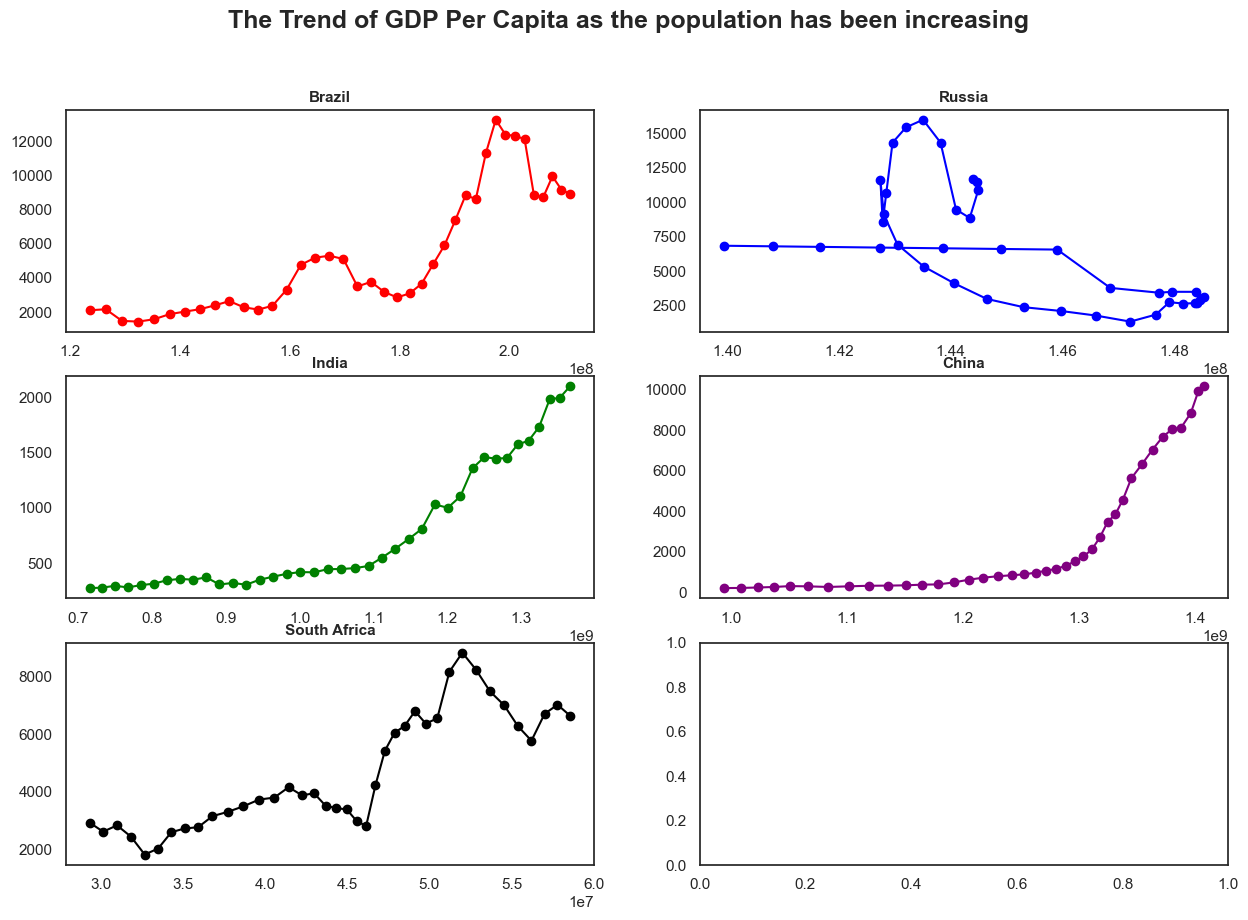

In [44]:
#Creating small multiples line chart to analyse trend of growing population and gdp per capita

fig, ax = plt.subplots(3,2)

ax[0, 0].plot(df_pop_brics_final['Brazil Population'], df_GDP_per_Capita_brics['Brazil GDP per Capita'], color = 'red', marker = 'o')
ax[0, 0].set_title('Brazil', fontsize = 11, fontweight = 'bold')
ax[0, 1].plot(df_pop_brics_final['Russia Population'], df_GDP_per_Capita_brics['Russia GDP per Capita'], color = 'blue', marker = 'o')
ax[0, 1].set_title('Russia', fontsize = 11, fontweight = 'bold')
ax[1, 0].plot(df_pop_brics_final['India Population'], df_GDP_per_Capita_brics['India GDP per Capita'], color = 'green', marker = 'o')
ax[1, 0].set_title('India', fontsize = 11, fontweight = 'bold')
ax[1, 1].plot(df_pop_brics_final['China Population'], df_GDP_per_Capita_brics['China GDP per Capita'], color = 'purple', marker = 'o')
ax[1, 1].set_title('China', fontsize = 11, fontweight = 'bold')
ax[2, 0].plot(df_pop_brics_final['South Africa Population'], df_GDP_per_Capita_brics['South Africa GDP per Capita'], color = 'black', marker = 'o')
ax[2, 0].set_title('South Africa', fontsize = 11, fontweight = 'bold')

plt.suptitle('The Trend of GDP Per Capita as the population has been increasing', fontsize = 18, fontweight = 'bold')


plt.show()


From the graphs its can be observed four out of the five countries have a general upward trend of GDP per Capita as the population is growing. However Russia does not illustrate a clear trend of growing population and GDP per Capita

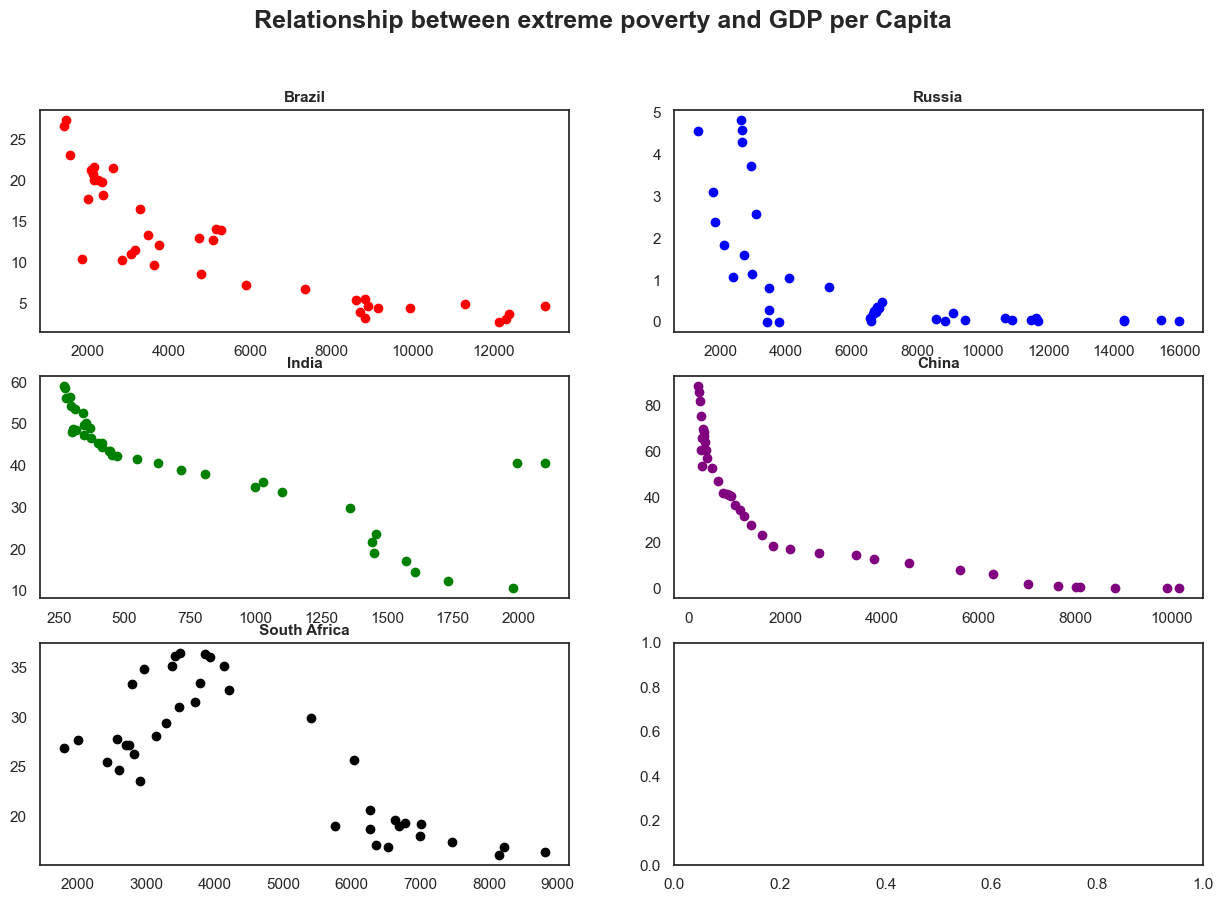

In [45]:
#Creating scatter plots to illustrate relationship between extreme poverty and GDP per Capita
fig, ax = plt.subplots(3,2)

ax[0, 0].scatter(df_GDP_per_Capita_brics['Brazil GDP per Capita'], df_poverty_brics['BRA $1.90 per day - share of population below poverty line'], color = 'red', marker = 'o')
ax[0, 0].set_title('Brazil', fontsize = 11, fontweight = 'bold')
ax[0, 1].scatter(df_GDP_per_Capita_brics['Russia GDP per Capita'], df_poverty_brics['RUS $1.90 per day - share of population below poverty line'], color = 'blue', marker = 'o')
ax[0, 1].set_title('Russia', fontsize = 11, fontweight = 'bold')
ax[1, 0].scatter(df_GDP_per_Capita_brics['India GDP per Capita'], df_poverty_brics['IND $1.90 per day - share of population below poverty line'], color = 'green', marker = 'o')
ax[1, 0].set_title('India', fontsize = 11, fontweight = 'bold')
ax[1, 1].scatter(df_GDP_per_Capita_brics['China GDP per Capita'], df_poverty_brics['CHN $1.90 per day - share of population below poverty line'], color = 'purple', marker = 'o')
ax[1, 1].set_title('China', fontsize = 11, fontweight = 'bold')
ax[2, 0].scatter(df_GDP_per_Capita_brics['South Africa GDP per Capita'], df_poverty_brics['RSA $1.90 per day - share of population below poverty line'], color = 'black', marker = 'o')
ax[2, 0].set_title('South Africa', fontsize = 11, fontweight = 'bold')

plt.suptitle('Relationship between extreme poverty and GDP per Capita', fontsize = 18, fontweight = 'bold')


plt.show()


All graphs seem to be illustrate some form of negative correlation

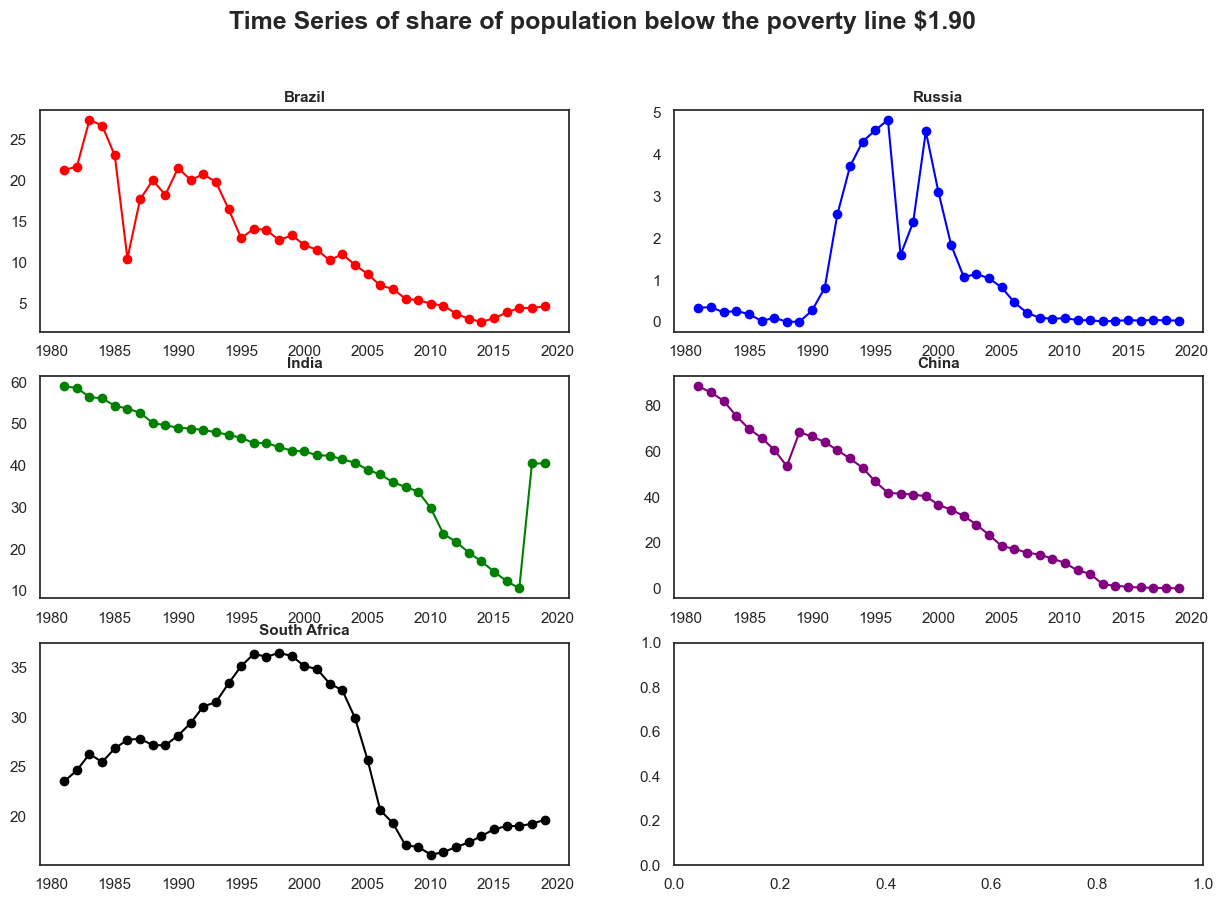

In [46]:
#Creating time series extreme poverty from 1981 to 2019
fig, ax = plt.subplots(3,2)

ax[0, 0].plot(df_poverty_brics.index, df_poverty_brics['BRA $1.90 per day - share of population below poverty line'], color = 'red', marker = 'o')
ax[0, 0].set_title('Brazil', fontsize = 11, fontweight = 'bold')
ax[0, 1].plot(df_poverty_brics.index, df_poverty_brics['RUS $1.90 per day - share of population below poverty line'], color = 'blue', marker = 'o')
ax[0, 1].set_title('Russia', fontsize = 11, fontweight = 'bold')
ax[1, 0].plot(df_poverty_brics.index, df_poverty_brics['IND $1.90 per day - share of population below poverty line'], color = 'green', marker = 'o')
ax[1, 0].set_title('India', fontsize = 11, fontweight = 'bold')
ax[1, 1].plot(df_poverty_brics.index, df_poverty_brics['CHN $1.90 per day - share of population below poverty line'], color = 'purple', marker = 'o')
ax[1, 1].set_title('China', fontsize = 11, fontweight = 'bold')
ax[2, 0].plot(df_poverty_brics.index, df_poverty_brics['RSA $1.90 per day - share of population below poverty line'], color = 'black', marker = 'o')
ax[2, 0].set_title('South Africa', fontsize = 11, fontweight = 'bold')

plt.suptitle('Time Series of share of population below the poverty line $1.90', fontsize = 18, fontweight = 'bold')


plt.show()

Brazil, China and India seem to be illustrating a more general downward trend, however, Russia and South Africa are showing some spikes in their time series where extreme poverty is rising in particular periods.

For Russia, extreme poverty spiked between the 1990s and early 2000s this was due to the political turmoil the nation was going through which had a domino effect on the economy which caused it to collapse that was characterised by elements such as hyperinflation.

For South Africa, extreme poverty spiked from the mid-1980s to the late 1990s which can be explained by the regime of apartheid that was occurring at the time. Hence a lot of the majority of black people were excluded from the economy which was dominated by the white minority. Hence making a lot of black people poor.


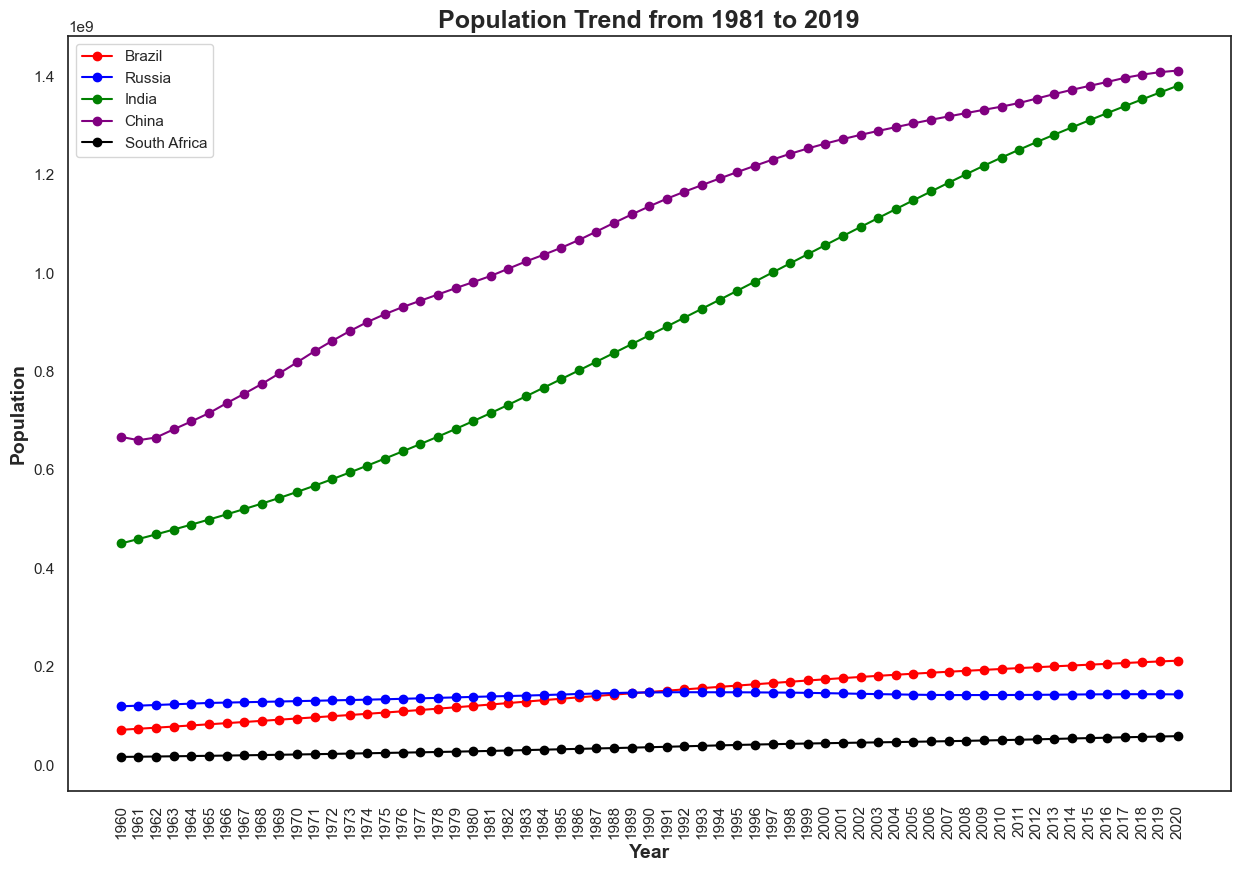

In [47]:
#PLotting the time series for population for the BRICS nations
ax = plt.axes()
ax.set_facecolor("white")
plt.plot(df_pop_brics.index,'Brazil Population', data = df_pop_brics, color = 'red', marker = 'o')
plt.plot(df_pop_brics.index,'Russia Population', data = df_pop_brics, color = 'blue', marker = 'o')
plt.plot(df_pop_brics.index,'India Population', data = df_pop_brics, color = 'green', marker = 'o')
plt.plot(df_pop_brics.index,'China Population', data = df_pop_brics, color = 'purple', marker = 'o')
plt.plot(df_pop_brics.index,'South Africa Population', data = df_pop_brics, color = 'black', marker = 'o')
plt.title('Population Trend from 1981 to 2019', fontsize = 18, fontweight = 'bold')
plt.xlabel('Year', fontsize = 14, fontweight = 'bold')
plt.ylabel('Population', fontsize = 14, fontweight = 'bold')
plt.legend(['Brazil', 'Russia', 'India', 'China', 'South Africa'])
plt.xticks(rotation = 90)
plt.show()

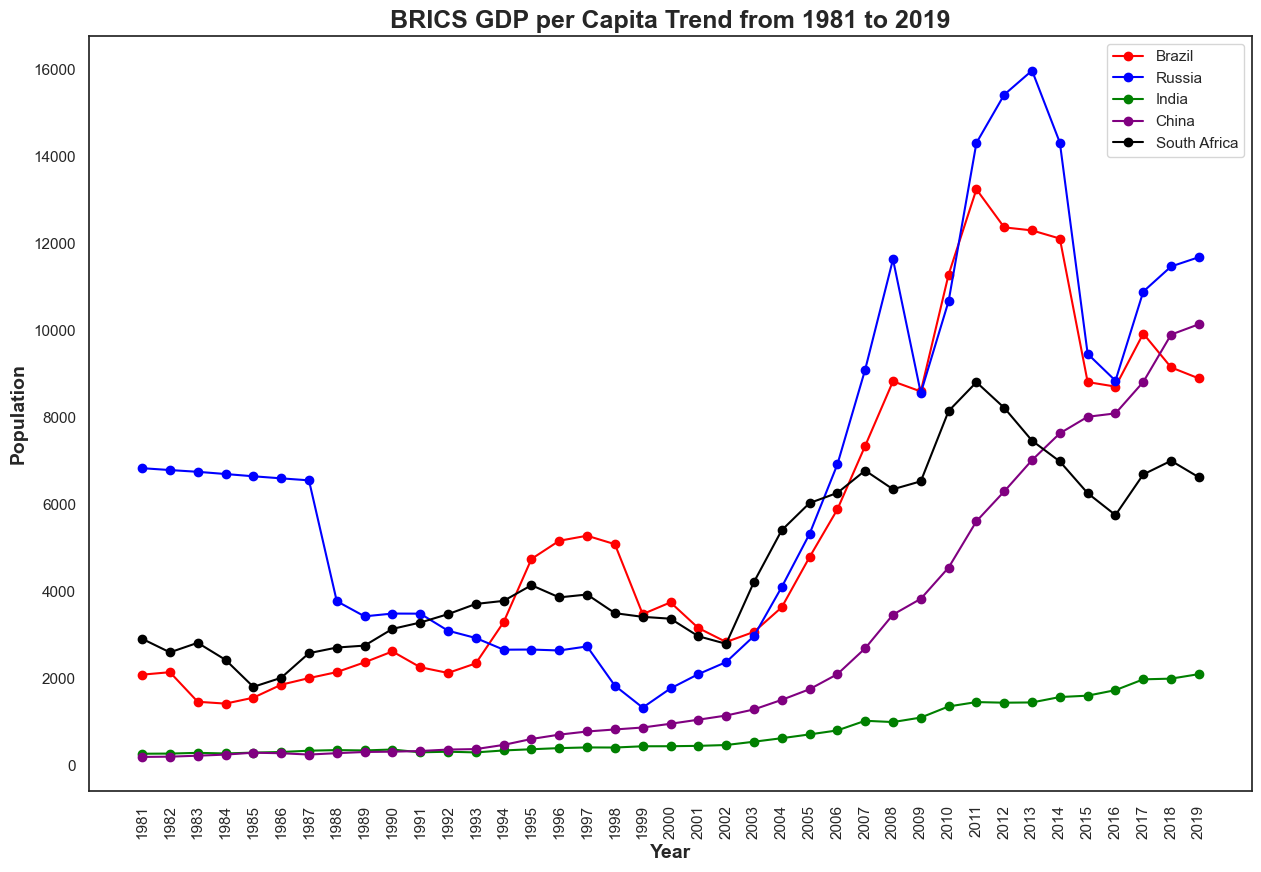

In [48]:
#Creating time series plot for BRICS nations from 1981 to 2019 
ax = plt.axes()
ax.set_facecolor("white")
plt.plot(df_GDP_per_Capita_brics.index,'Brazil GDP per Capita', data = df_GDP_per_Capita_brics, color = 'red', marker = 'o')
plt.plot(df_GDP_per_Capita_brics.index,'Russia GDP per Capita', data = df_GDP_per_Capita_brics, color = 'blue', marker = 'o')
plt.plot(df_GDP_per_Capita_brics.index,'India GDP per Capita', data = df_GDP_per_Capita_brics, color = 'green', marker = 'o')
plt.plot(df_GDP_per_Capita_brics.index,'China GDP per Capita', data = df_GDP_per_Capita_brics, color = 'purple', marker = 'o')
plt.plot(df_GDP_per_Capita_brics.index,'South Africa GDP per Capita', data = df_GDP_per_Capita_brics, color = 'black', marker = 'o')
plt.title('BRICS GDP per Capita Trend from 1981 to 2019', fontsize = 18, fontweight = 'bold')
plt.xlabel('Year', fontsize = 14, fontweight = 'bold')
plt.ylabel('Population', fontsize = 14, fontweight = 'bold')
plt.legend(['Brazil', 'Russia', 'India', 'China', 'South Africa'])
plt.xticks(rotation = 90)
plt.show()

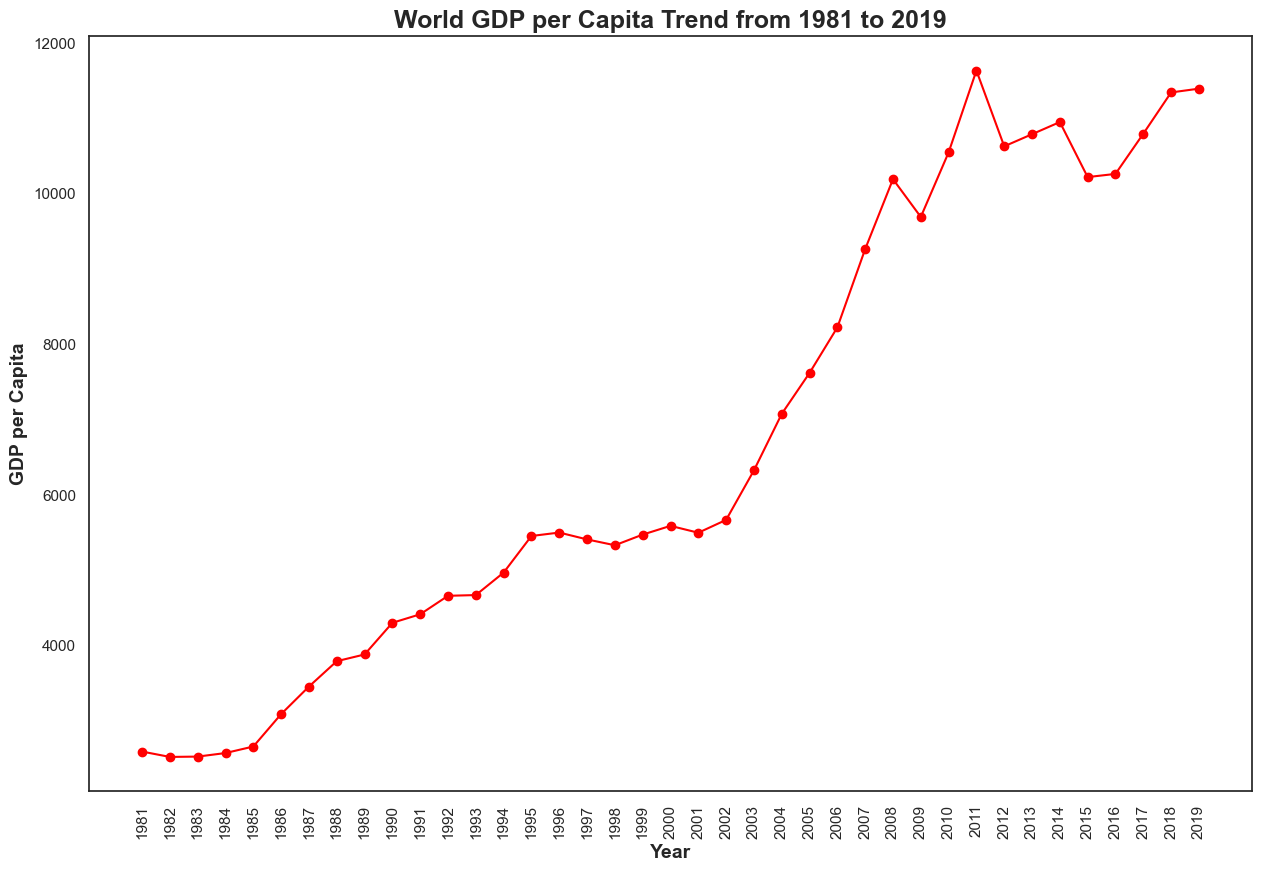

In [49]:
#Creating time series plot of the World GDP per capita from 1981 to 2019
plt.plot(df_world_gdp_poverty_pop.index,'World GDP per Capita', data = df_world_gdp_poverty_pop, color = 'red', marker = 'o')
plt.xticks(rotation = 90)
plt.xlabel('Year', fontsize = 14, fontweight = 'bold')
plt.ylabel('GDP per Capita', fontsize = 14, fontweight = 'bold')
plt.title('World GDP per Capita Trend from 1981 to 2019', fontsize = 18, fontweight = 'bold')
plt.show()

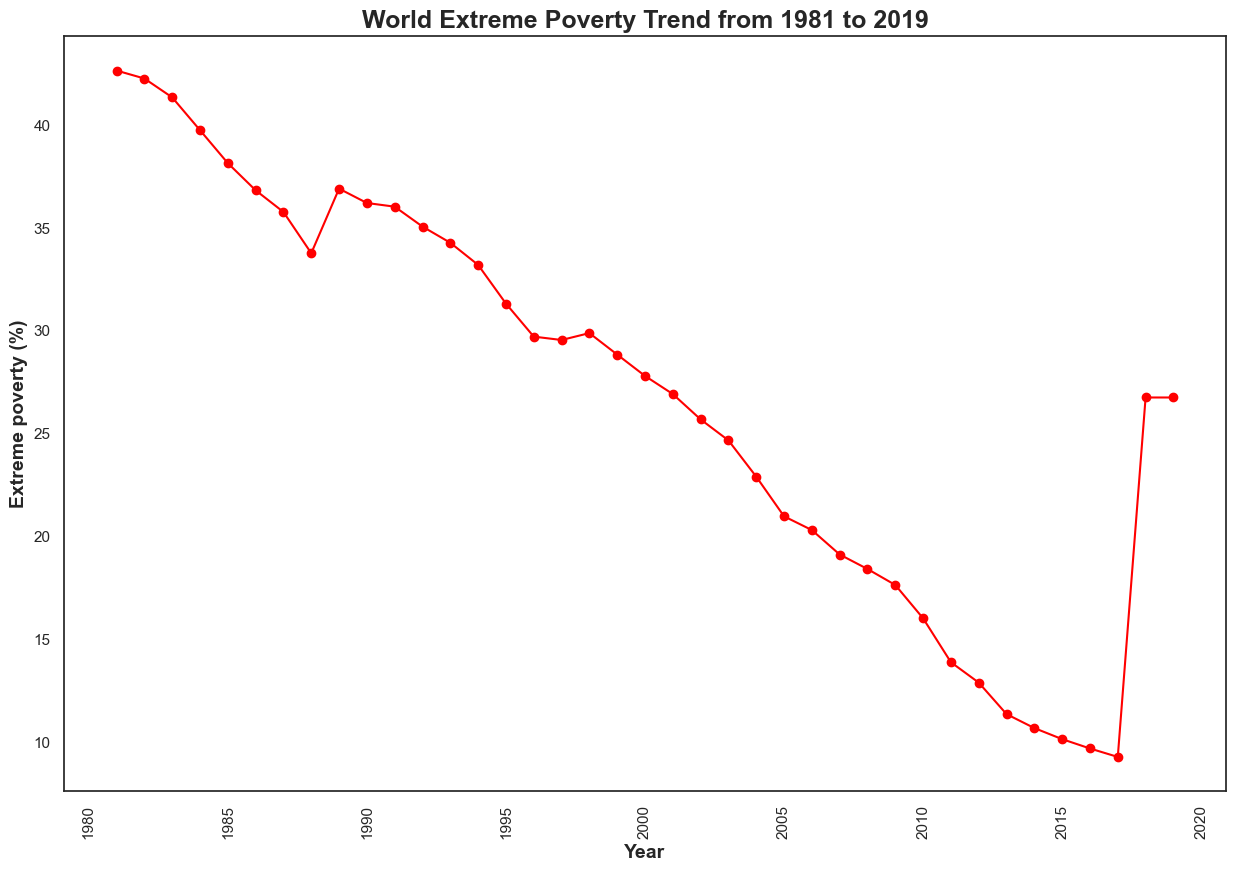

In [50]:
#Creating time series plot of the World for extreme poverty from 1981 to 2019
plt.plot(df_poverty_world.index,'World $1.90 per day - share of population below poverty line', data = df_poverty_world, color = 'red', marker = 'o')
plt.xticks(rotation = 90)
plt.xlabel('Year', fontsize = 14, fontweight = 'bold')
plt.ylabel('Extreme poverty (%)', fontsize = 14, fontweight = 'bold')
plt.title('World Extreme Poverty Trend from 1981 to 2019', fontsize = 18, fontweight = 'bold')
plt.show()

# Test and train model

In [51]:
#Converting the columns of the poverty dataframe into numpy arrarys and horizontally stacking them
bra_pov = df_poverty_brics['BRA $1.90 per day - share of population below poverty line'].values
rus_pov = df_poverty_brics['RUS $1.90 per day - share of population below poverty line'].values
ind_pov = df_poverty_brics['IND $1.90 per day - share of population below poverty line'].values
chi_pov = df_poverty_brics['CHN $1.90 per day - share of population below poverty line'].values
rsa_pov = df_poverty_brics['RSA $1.90 per day - share of population below poverty line'].values

#Independent variable 
x = np.hstack((bra_pov,rus_pov,ind_pov,chi_pov,rsa_pov))

bra_gpc = df_GDP_per_Capita_brics['Brazil GDP per Capita']
rus_gpc = df_GDP_per_Capita_brics['Russia GDP per Capita']
ind_gpc = df_GDP_per_Capita_brics['India GDP per Capita']
chi_gpc = df_GDP_per_Capita_brics['China GDP per Capita']
rsa_gpc = df_GDP_per_Capita_brics['South Africa GDP per Capita']

#Dependent variable
y = np.hstack((bra_gpc,rus_gpc, ind_gpc,chi_gpc,rsa_gpc))

In [52]:
#checking the shape of the arrays
print(x.shape)
print(y.shape)

(195,)
(195,)


In [53]:
#reshaping the arrays so that its a 2D array
x = np.reshape(x, (-1,1))
y = np.reshape(y, (-1,1))

In [54]:
print(x.shape)
print(y.shape)

(195, 1)
(195, 1)


In [55]:
# Splitting the data into two groups (training set and testing set)
# Setting the portion of the testing set to 20%
#** The train data set is used to fit the regression model, the testing data set is used to evaluate the fit of the regression model
# Random state will be set to 0 so as to reproduce the results.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

In [56]:
print(x_train[:5])
print(x_train.shape)

[[ 4.577346]
 [12.94312 ]
 [81.80049 ]
 [12.1042  ]
 [ 0.      ]]
(156, 1)


In [57]:
print(x_test[:5])
print(x_test.shape)

[[41.72202 ]
 [13.9536  ]
 [13.32769 ]
 [ 3.711311]
 [27.1492  ]]
(39, 1)


In [58]:
model = LinearRegression().fit(x_train, y_train)

In [59]:
model.intercept_

array([6806.5529046])

In [60]:
model.coef_

array([[-122.04793742]])

In [61]:
model.score(x_train, y_train)

0.4787892774866256

In [62]:
model.score(x_test, y_test)

0.49369340726434185

# Comments

Both the train and test scores are quite similar although the test score is slightly.
The model scores are the coefficients of determination or R^2 which is the percentage of the dependent variable variation that a linear model explains.

Therefore in simple terms if we take the test model score this is interpreted as 49.37 percent GDP per Capita explains extreme poverty
